In [1]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
# Generate non-linearly separable data
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

In [3]:
# Create a pipeline for SVM classifier with soft margin (C=1)
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="linear", C=1, random_state=42))

])

In [4]:
# Fit the classifier
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, kernel='linear', random_state=42))])

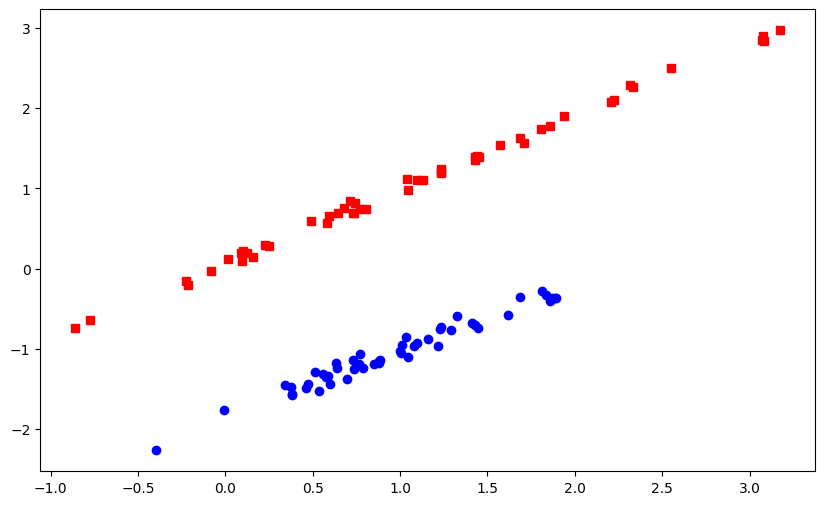

In [5]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "rs", label="Class 1")

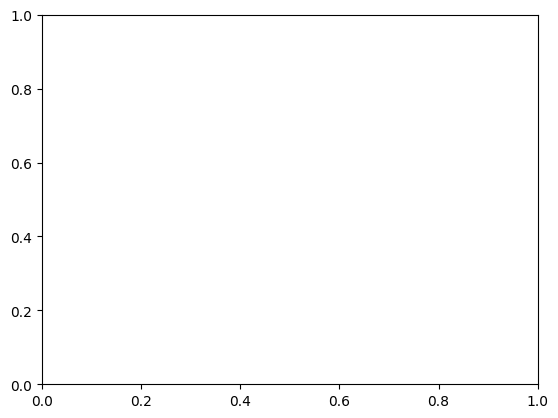

In [6]:
# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [7]:
# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_clf.decision_function(xy).reshape(XX.shape)

In [8]:
# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

<ipython-input-9-884c40160eca>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")


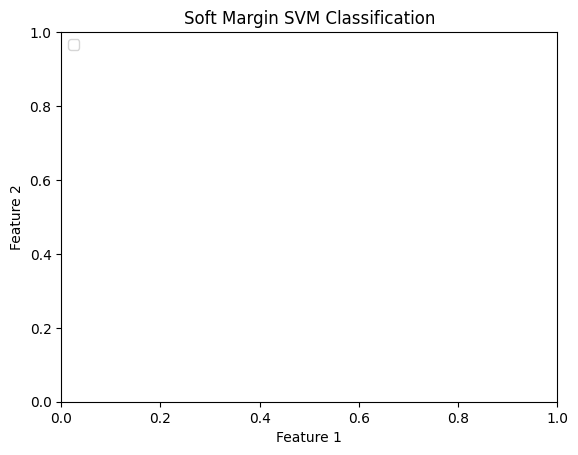

In [9]:
# Highlight support vectors
ax.scatter(svm_clf.named_steps['scaler'].inverse_transform(svm_clf.named_steps['svm_clf'].support_vectors_)[:, 0],
           svm_clf.named_steps['scaler'].inverse_transform(svm_clf.named_steps['svm_clf'].support_vectors_)[:, 1],
           s=300, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper left")
plt.title("Soft Margin SVM Classification")
plt.show()

# Python Code to Perform Linear SVM Classification

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [11]:
# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization purposes
y = iris.target

In [12]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 5: Train the Linear SVM Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
# Step 6: Make predictions
y_pred = svm_classifier.predict(X_test)

In [15]:
# Step 7: Evaluate the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [16]:
# Step 8: Visualize the Decision Boundary
# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

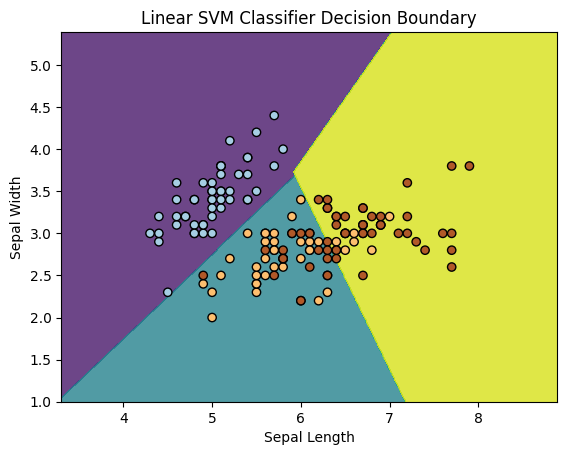

In [17]:
# Plot decision boundary
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Linear SVM Classifier Decision Boundary')

plt.show()

# Code to Implement Non-linear SVM Classifier

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll only use the first two features for visualization purposes
y = iris.target

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Create a nonlinear SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', gamma='scale', C=1.0)

In [22]:
# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC()

In [23]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [25]:
# Plot decision boundary
def plot_decision_boundary(X, y, classifier):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("SVM decision boundary")

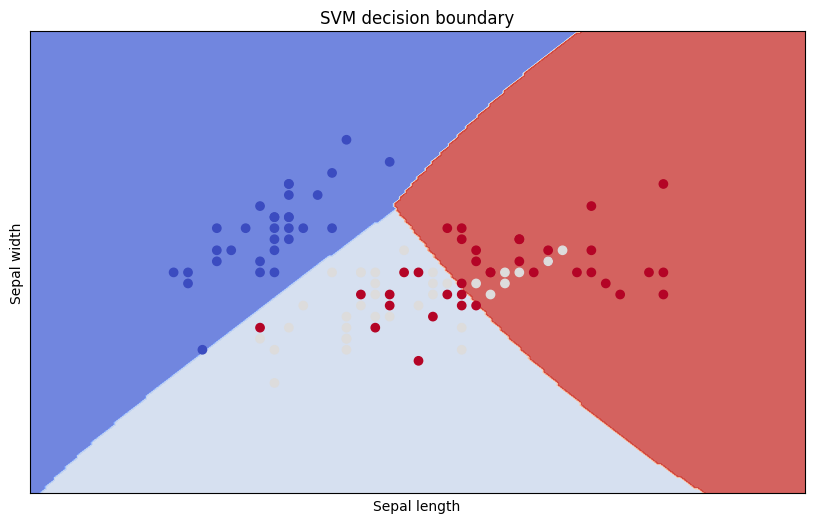

In [26]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, svm_classifier)
plt.show()

# Practical Implementation

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [28]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [29]:
# Use only one feature for demonstration purposes (feature index 2)
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Initialize and train the SVR model
svr = SVR(kernel='rbf')  # RBF kernel is commonly used for SVR
svr.fit(X_train_scaled, y_train)

SVR()

In [33]:
# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

In [34]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 4256.447863479731


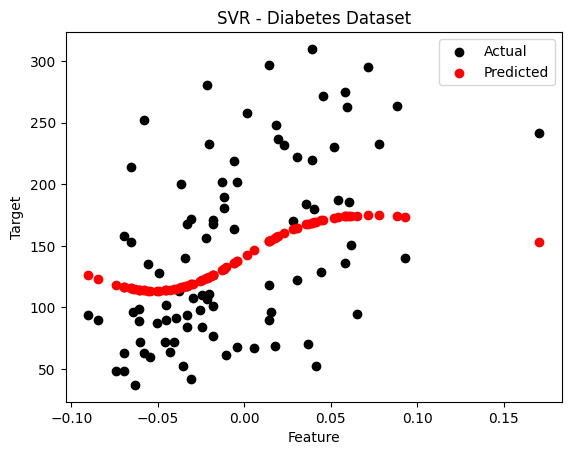

In [35]:
# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('SVR - Diabetes Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')

plt.legend()

plt.show()